# Classification with dense or convolutional neural network

Comparison of the tutorials of tensorflow.org : 
- Initial multiclass tutorial using Dense (Perceptron) layers - https://www.tensorflow.org/tutorials/keras/basic_classification
- Convolutionnal neural network (CNN) tutorial

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(keras.__version__)

2.2.4-tf


## Data

Using the fashion MNIST dataset from https://github.com/zalandoresearch/fashion-mnist
It is made of 70k pictures classified in 10 categories. 
Images are greyscale, 28x28 pixels.

The train/test split is 60/10

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image_width = 28
image_height = 28
n_classes = 10

In [6]:
train_images.shape

(60000, 28, 28)

Scaling the 8 bit pixels of the images to float values in [0,1)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Helpers

In [64]:
def plot_history(hist):
    """ Plot a classification history as outputted by Keras """
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(hist.history['loss'])
    plt.grid()
    plt.title('Loss')
    plt.subplot(1,3,2)
    plt.plot(hist.history['acc'])
    plt.grid()
    plt.title('Accuracy');

## Classical model based on Dense layers

https://www.tensorflow.org/tutorials/keras/basic_classification

- Images are first flattened to 1D vectors of length 28*28 = 784, loosing the 2D information
- The second layer is based on 128 neurons with 784 inputs, that is 100480 coefficients including the intercepts (bias)
- Last layer is classifying on the 10 categories

In [25]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_width, image_height)),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(n_classes, activation=keras.activations.softmax)
], 'model1')

model1.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model1.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist1 = model1.fit(train_images, train_labels, epochs=10, verbose=0)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4963 - acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3798 - acc: 0.8634
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3375 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3143 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2948 - acc: 0.8920
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2829 - acc: 0.8959
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2676 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2592 - acc: 0.9040
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2474 - acc: 0.9085
Epoch 10/10
60000/60000 [==============================] - 4s 67us/sample - loss: 

Final train accuracy: 0.911


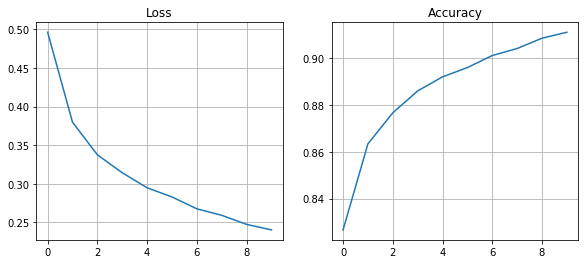

In [66]:
plot_history(hist1)
print('Final train accuracy: {:.3f}'.format(hist1.history['acc'][-1]))

In [38]:
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
print('Test loss: {:.3f} accuracy: {:.3f}'.format(test_loss1, test_acc1))
predictions1 = model1.predict(test_images)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3435 - acc: 0.8806
Test loss: 0.344 accuracy: 0.881


As observed in the original tutorial, the accuracy in validation is lower than the one in training.

Given the high number of coefficients (> 100k) compared to the number of train and test samples, this is expected.

### Adding regularizer to the classical model

See also: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [67]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_width, image_height)), 
    keras.layers.Dense(128, activation=keras.activations.relu,
                       bias_regularizer=keras.regularizers.l1(0.0001),    # <---
                       kernel_regularizer=keras.regularizers.l1(0.0001)), # <---
    keras.layers.Dense(n_classes, activation=keras.activations.softmax)
], 'model2')

model2.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

hist2 = model2.fit(train_images, train_labels, epochs=10, verbose=0)

Final train accuracy: 0.878


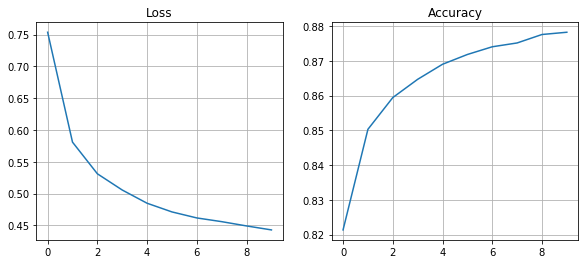

In [68]:
plot_history(hist2)
print('Final train accuracy: {:.3f}'.format(hist2.history['acc'][-1]))

In [69]:
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
print('Test loss: {:.3f} accuracy: {:.3f}'.format(test_loss2, test_acc2))
# predictions2 = model2.predict(test_images)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.5029 - acc: 0.8603
Test loss: 0.503 accuracy: 0.860


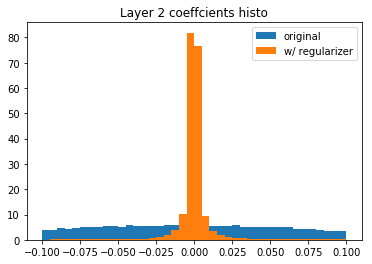

In [70]:
plt.hist(model1.get_weights()[0].reshape(-1), bins=40, range=(-0.1, 0.1), density=True);
plt.hist(model2.get_weights()[0].reshape(-1), bins=40, range=(-0.1, 0.1), density=True);
plt.title('Layer 2 coefficients histo')
plt.legend(('original', 'w/ regularizer'));

The effect of the regularizer is clearly visible on the coefficients distribution.
It has an effect on the accurracy in lowering a little the prediction

But overfitting is not shown when estimating the data on the test set

We might then think that the Dense layer of 784 x 128 is overdimensionned

## Optimizing the number of neurons in the Dense layer #2

In [74]:
hist3 = []
for n_neurons in [4, 16, 48, 64, 96, 128, 256]:
    model3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(image_width, image_height)), 
        keras.layers.Dense(n_neurons, activation=keras.activations.relu,      # <---
                           bias_regularizer=keras.regularizers.l1(0.0001),    # <---
                           kernel_regularizer=keras.regularizers.l1(0.0001)), # <---
        keras.layers.Dense(n_classes, activation=keras.activations.softmax)
    ])

    model3.compile(optimizer='adam',
                  loss=keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

    h = model3.fit(train_images, train_labels, epochs=10, verbose=0)
    hist3.append(h)
    print('Final train accuracy for size {:d}: {:.3f}'.format(n_neurons, h.history['acc'][-1]))

Final train accuracy for size 4: 0.812
Final train accuracy for size 16: 0.866
Final train accuracy for size 48: 0.875
Final train accuracy for size 64: 0.879
Final train accuracy for size 96: 0.879
Final train accuracy for size 128: 0.878
Final train accuracy for size 256: 0.879


## Classical model with 48 neurons

As shown above, the original model with 128 neurons is behaving as good as the one with 48 neurons

In [106]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_width, image_height)), 
    keras.layers.Dense(48, activation=keras.activations.relu,             # <---
                       bias_regularizer=keras.regularizers.l1(0.0001),    # <---
                       kernel_regularizer=keras.regularizers.l1(0.0001)), # <---
    keras.layers.Dense(n_classes, activation=keras.activations.softmax)
], name='model4')

model4.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

hist4 = model4.fit(train_images, train_labels, epochs=20, verbose=0)

In [86]:
model4.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 48)                37680     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                490       
Total params: 38,170
Trainable params: 38,170
Non-trainable params: 0
_________________________________________________________________


Final train accuracy: 0.886


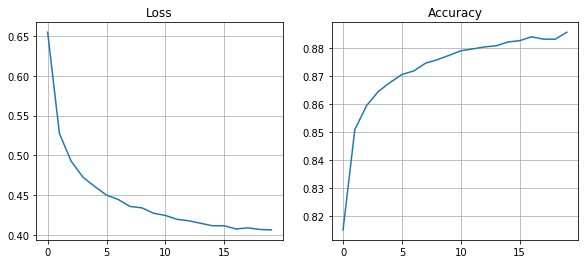

In [107]:
plot_history(hist4)
print('Final train accuracy: {:.3f}'.format(hist4.history['acc'][-1]))

In [109]:
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)
print('Test loss: {:.3f} accuracy: {:.3f}'.format(test_loss4, test_acc4))

10000/10000 [==============================] - 1s 61us/sample - loss: 0.4901 - acc: 0.8581
Test loss: 0.490 accuracy: 0.858


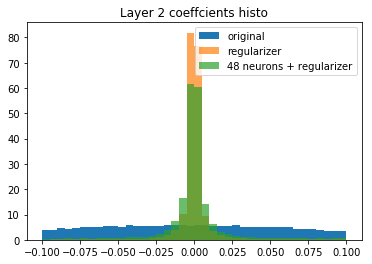

In [94]:
plt.hist(model1.get_weights()[0].reshape(-1), bins=40, range=(-0.1, 0.1), density=True);
plt.hist(model2.get_weights()[0].reshape(-1), bins=40, range=(-0.1, 0.1), density=True, alpha=0.7);
plt.hist(model4.get_weights()[0].reshape(-1), bins=40, range=(-0.1, 0.1), density=True, alpha=0.7);
plt.title('Layer 2 coefficients histo')
plt.legend(('original', 'regularizer', '48 neurons + regularizer'));

With 48 neurons, the performance is quasi identical to the original model but with 1/3 of the number of coefficients. Moreover, the overfitting is decreased by the lower number of parameters versus the train data set size

# Convolutional neural network

https://www.tensorflow.org/beta/tutorials/images/intro_to_cnns  __!! Tensorflow v2.0-beta tutorial__ but it works with TF v1.14, convergence is slower though

In [ ]:
model5 = keras.models.Sequential([
    # Single image channel
    keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu, input_shape=(image_width, image_height, 1)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
], 'model5')

model5.compile(optimizer='adam',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model5.summary()

hist5 = model5.fit(train_images.reshape((60000, image_width, image_height, 1)), train_labels, 
                   epochs=24, validation_split=0.2, 
                   workers=2, verbose=0)

Model: "model5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_38 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 64)                36928

In [ ]:
plot_history(hist5)
print('Final train accuracy: {:.3f}'.format(hist5.history['acc'][-1]))

In [ ]:
test_loss5, test_acc5 = model5.evaluate(test_images.reshape(10000, image_width, image_height, 1), test_labels, verbose=0)
print('Test loss: {:.3f} accuracy: {:.3f}'.format(test_loss5, test_acc5))